In [1]:
import numpy as np 
import pandas as pd
import pandas_datareader.data as web
import watermark

In [3]:
sp500 = web.DataReader('^GSPC', data_source='yahoo', start='01/01/2000', end='10/01/2020')
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5221 entries, 2000-01-03 to 2020-10-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       5221 non-null   float64
 1   Low        5221 non-null   float64
 2   Open       5221 non-null   float64
 3   Close      5221 non-null   float64
 4   Volume     5221 non-null   int64  
 5   Adj Close  5221 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 285.5 KB


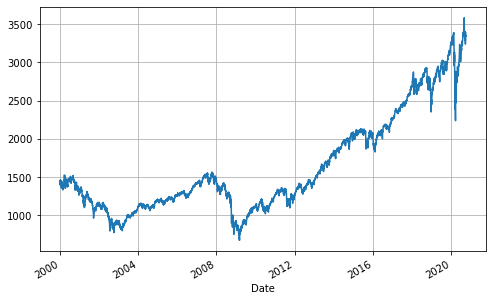

In [4]:
sp500['Close'].plot(grid=True, figsize=(8, 5))
money=sp500['Close']

In [5]:
sp500['42d'] = np.round(money.rolling(42).mean()) 
sp500['252d'] = np.round(money.rolling(252).mean())

In [6]:
sp500[['Close', '42d', '252d']].tail()

,Close,42d,252d
Date,,,
2020-09-25,3298.459961,3372.0,3095.0
2020-09-28,3351.600098,3374.0,3096.0
2020-09-29,3335.469971,3376.0,3097.0
2020-09-30,3363.000000,3379.0,3099.0
2020-10-01,3380.800049,3381.0,3101.0


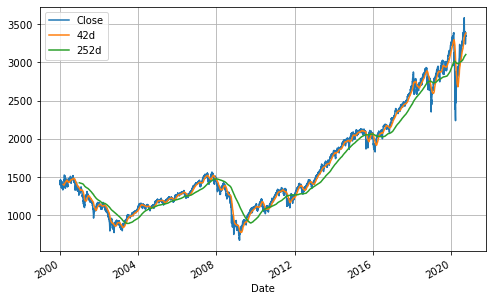

In [7]:
sp500[['Close', '42d', '252d']].plot(grid=True, figsize=(8, 5))

In [8]:
sp500['42-252'] = sp500['42d'] - sp500['252d'] 
sp500['42-252'].tail()

Date
2020-09-25    277.0
2020-09-28    278.0
2020-09-29    279.0
2020-09-30    280.0
2020-10-01    280.0
Name: 42-252, dtype: float64

In [9]:
sp500['42-252'].head()

Date
2000-01-03   NaN
2000-01-04   NaN
2000-01-05   NaN
2000-01-06   NaN
2000-01-07   NaN
Name: 42-252, dtype: float64

In [10]:
SD=50
sp500['Regime'] = np.where(sp500['42-252'] > SD, 1, 0) 
sp500['Regime'] = np.where(sp500['42-252'] < -SD, -1, sp500['Regime']) 
sp500['Regime'].value_counts()

 1    2714
 0    1457
-1    1050
Name: Regime, dtype: int64

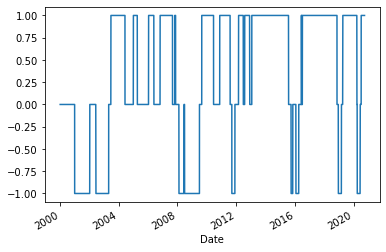

In [11]:
sp500['Regime'].plot(lw=1.5) 

In [12]:
sp500['Market'] = np.log(sp500['Close'] / sp500['Close'].shift(1))

In [13]:
sp500['Strategy'] = sp500['Regime'].shift(1) * sp500['Market']

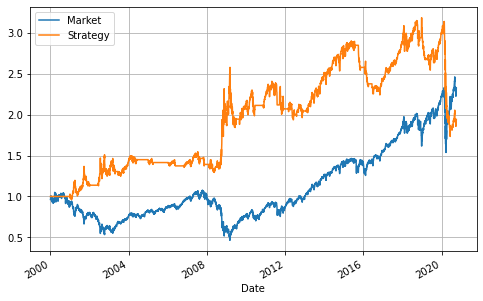

In [14]:
sp500[['Market', 'Strategy']].cumsum().apply(np.exp).plot(grid=True, figsize=(8, 5))